# asdf

### Inleiding

### Aanpak

### Uitwerking
Allereerst wordt er een klasse geschreven van waaruit elke auto zijn eigen object is.
Hiervoor is gekozen omdat


In [141]:
import csv
import matplotlib.pyplot as plt

class Vehicle:
    """
    This class represents a vehicle
    """
    def __init__(self, col_num):
        self.current_position = 0.0
        self.begin_position = 0.0
        self.distance_traveled = 0.0
        self.direction = ""
        self.col_id = int(col_num)
        self.last_velocity = 0.0
        self.distance_list = []
    
    def get_current_position(self):
        """Returns the current position of the vehicle"""
        return self.current_position
    
    def set_direction(self, direction):
        """Sets the direction"""
        self.direction = direction
    
    def get_direction(self):
        """Returns the direction"""
        return self.direction
    
    def set_begin_position(self, bg_pos):
        """"""
        self.begin_position = float(bg_pos)
        
    def set_last_velocity(self, last_velo):
        """"""
        self.last_velocity = float(last_velo)
    
    def set_distance_list(self, new_velo):
        """"""
        # calculate the mean velocity and from there the distance traveled
        mean_velocity = (((new_velo - self.last_velocity) / 2) + self.last_velocity)
        new_distance = mean_velocity * 0.1
        
        # update the car's position
        self.distance_traveled += new_distance
        self.current_position = self.begin_position + self.distance_traveled
        
        # add the new position to the list and update the last velocity
        self.distance_list.append(self.distance_traveled)
        self.last_velocity = new_velo
    
    def get_distance_list(self):
        """Returns the a list with all the positions of said vehicle"""
        return self.distance_list
    

asdf


In [142]:
file_name1 = "verkeerssimulatie-richting.csv"

with open(file_name1, 'r') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=';')
    
    # 
    vehicle_list = []
    is_first_row = True
    
    for row in csv_reader:
        
        if is_first_row:
            
            for car in row:
                # instantiate a new vehicle and add to the list
                vehicle_list.append(Vehicle(car))
            is_first_row = False
        
        else:
            
            for car in vehicle_list:
                # set the travel direction for a vehicle
                car.set_direction(row[car.col_id + - 1])

# printing car with its direction
for car in vehicle_list:
    print("Car {0}; direction: {1}".format(car.col_id, car.get_direction()))


Car 1; direction: h
Car 2; direction: v
Car 3; direction: v


asdf


In [143]:
def check_for_collision(vehicle_list):
    """"""
    
    for car in vehicle_list:
        
        car_begin = car.get_current_position() + 1
        car_end = car.get_current_position() - 1
        car_direction = car.get_direction()
        
        for car2 in vehicle_list:
            
            if car.col_id == car2.col_id:
                # skip the iteration if it's the same car
                continue
            else:
                # the car is not itself
                
                car2_begin = car2.get_current_position() + 1
                car2_end = car2.get_current_position() - 1
                
                if car_direction == car2.get_direction():
                    # the cars are heading in the same direction
                    pass
                else:
                    # the cars will cross
                    pass
                
        
    
    

asdf


In [144]:
file_name2 = "verkeerssimulatie-rechteweg-snelheden.csv"

with open(file_name2, 'r') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=';')
    
    # 
    x_count = 0
    
    # 
    for row in csv_reader:
        
        # first row in csv file
        if x_count == 0:
            # 
            for car in vehicle_list:
                # retrieve the current_position of every car
                car.set_begin_position(row[car.col_id])
                
            # increment count
            x_count += 1
        
        # second row in csv file
        elif x_count == 1:
            # 
            for car in vehicle_list:
                car.set_last_velocity(row[car.col_id])
            # increment count
            x_count += 1
        
        # all the other rows in the csv file
        else:
            # 
            for car in vehicle_list:
                
                # 
                velocity = float(row[car.col_id])
                car.set_distance_list(velocity)
                
            # check for collision
            check_for_collision(vehicle_list)
            
            # increment count
            x_count += 1
            break

# 
for car in vehicle_list:
    print("Car: {0}\n"
          "Direction: {1}\n"
          "Begin position: {2}m\n"
          "Traversed distance: {3}\n"
          "End position: {4}m\n".format(car.col_id, car.get_direction(),
                                        car.begin_position, car.distance_traveled,
                                        car.get_current_position()))


TypeError: 'float' object cannot be interpreted as an integer

plotting the data


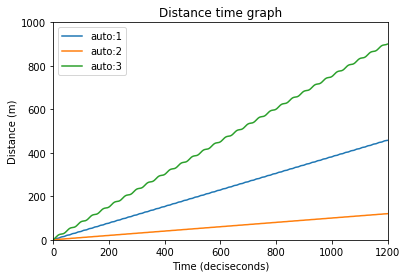

In [139]:
# 
max_distance = 0.0
for car in vehicle_list:
    if car.distance_traveled > max_distance:
        max_distance = car.distance_traveled

# initializing the axes limits
plt.xlim(0.1, x_count)
plt.ylim(0, int(max_distance) + 100)

# labeling plots
plt.title("Distance time graph")
plt.xlabel("Time (deciseconds)")
plt.ylabel("Distance (m)")

# plot for every car its velocities in the graph
for car in vehicle_list:
    plt.plot(car.get_distance_list(), label='auto:{0}'.format(car.col_id))
plt.legend(loc='upper left')
